In [1]:
import itertools
import pylhe
import hist
import numpy as np

In [2]:
import math
import hist

In [3]:
lhe_file = "/home/josecasa/Descargas/PP_Wp_BTauNu_M1.lhe.gz"

In [4]:
events = pylhe.to_awkward(pylhe.read_lhe_with_attributes(lhe_file))

In [5]:
events

<EventArray [{eventinfo: {...}, ...}, ..., {...}] type='100000 * Event[even...'>

In [6]:
print(f"Number of events: {pylhe.read_num_events(lhe_file)}")

Number of events: 100000


In [7]:
events.particles.status==1

<Array [[False, False, False, ..., True, True], ...] type='100000 * var * bool'>

In [8]:
events.particles.vector

<MomentumArray4D [[{x: 0, y: 0, z: 765, ...}, ...], ...] type='100000 * var...'>

In [9]:
#Getting index for tau
tauind=-3
sum(abs(events.particles.id[:, tauind])!=15)

0

In [10]:
#Getting index for nu
nuind=-2
sum(abs(events.particles.id[:, nuind])!=16)

0

In [11]:
#Getting index for b
bind=-1
sum(abs(events.particles.id[:, bind])!=5)

0

In [12]:
#Tau and b Invaraint Mass
InvMassbtau = hist.Hist.new.Reg(50, 50, 1000).Int64()
InvMassbtau.fill((events.particles.vector[:, bind] + events.particles.vector[:, tauind]).mass)

Hist(Regular(50, 50, 1000, label='Axis 0'), storage=Int64()) # Sum: 92023.0 (100000.0 with flow)

/home/josecasa/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


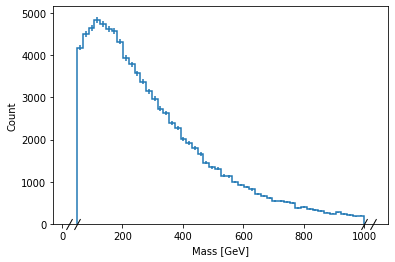

In [13]:
artists = InvMassbtau.plot1d()
ax = artists[0].stairs.axes
#ax.set_yscale("log")
ax.set_xlabel("Mass [GeV]")
ax.set_ylabel("Count");

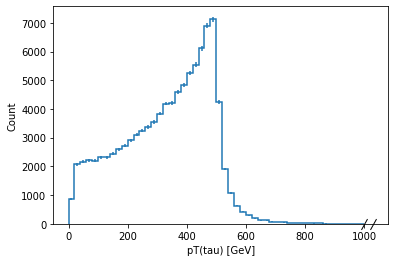

In [14]:
#Tau pT
TauPT = hist.Hist.new.Reg(50, 0, 1000).Int64()
TauPT.fill((events.particles.vector[:, tauind]).pt)
TauPTart = TauPT.plot1d()
TauPTax = TauPTart[0].stairs.axes
#ax.set_yscale("log")
TauPTax.set_xlabel("pT(tau) [GeV]")
TauPTax.set_ylabel("Count");

For the transverse mass

In [28]:
tauvecs = events.particles.vector[:, tauind]

In [29]:
tauvecs.deltaphi?

In [25]:
DeltaPhi=events.particles.vector[:, tauind].deltaphi(events.particles.vector[:, nuind])
print(DeltaPhi)

[-3.04, 3.12, 3.03, -2.42, -3.12, 3.06, ..., -3.12, -3.14, -3.05, 3.14, -3.12]


In [33]:
deltaphihisto = hist.Hist.new.Reg(100, 0, 6.3).Int64()
deltaphihisto.fill(DeltaPhi+np.pi)

Hist(Regular(100, 0, 6.3, label='Axis 0'), storage=Int64()) # Sum: 100000.0

In [34]:
np.cos(DeltaPhi+np.pi)

<Array [0.995, 1, 0.993, 0.751, 1, ..., 1, 0.996, 1, 1] type='100000 * float64'>

In [60]:
mts=np.sqrt((2*(events.particles.vector[:, tauind]).pt*(events.particles.vector[:, nuind]).pt)*(1-np.cos(DeltaPhi+np.pi)))
print(mts)

[41.2, 10, 57.4, 196, 5.15, 34.6, ..., 8.46, 11.5, 0.184, 37.5, 1.14, 11.4]


In [61]:
mthisto = hist.Hist.new.Reg(200, 0, 2000).Int64()
mthisto.fill(mts)

Hist(Regular(200, 0, 2000, label='Axis 0'), storage=Int64()) # Sum: 100000.0

For the total mass

In [46]:
nuvecs = events.particles.vector[:, nuind]

In [38]:
bquark = events.particles.vector[:, bind]

In [47]:
FirstTerm=np.square(tauvecs.pt+bquark.pt+nuvecs.pt)
SeconmTerm=np.square((tauvecs+bquark+nuvecs).pt)

In [48]:
mtothisto = hist.Hist.new.Reg(200, 0, 2000).Int64()
mtothisto.fill(np.sqrt(FirstTerm-SeconmTerm))

Hist(Regular(200, 0, 2000, label='Axis 0'), storage=Int64()) # Sum: 99832.0 (100000.0 with flow)

Using missing energy instead of the neutrino

In [52]:
def Phi_0_2pi(phiangle):
    mask1 = phiangle >= 2*np.pi
    mask2 = phiangle < 0
    newphiangle = phiangle+(mask1*-2*np.pi)+(mask2*2*np.pi)
    return newphiangle

In [42]:
MET = np.sqrt(np.square((bquark.px + tauvecs.px))+np.square((bquark.py + tauvecs.py)))
print(MET)

[391, 486, 516, 254, 205, 428, 54.3, ..., 463, 78.8, 476, 401, 409, 390, 453]


In [54]:
METphi=Phi_0_2pi(np.arctan((bquark.py + tauvecs.py)/(bquark.px + tauvecs.px))+2*np.pi)
print(METphi)

[5.43, 0.548, 5.97, 5.01, 5.59, 0.582, ..., 0.707, 5.82, 1.54, 4.86, 4.77, 5.08]


In [55]:
sum(METphi<0)

0

In [62]:
mTreco=np.sqrt((2*(events.particles.vector[:, tauind]).pt*(MET)*(1-np.cos(Phi_0_2pi(Phi_0_2pi(events.particles.vector[:, tauind].phi)-METphi)))))
print(mTreco)

[827, 10, 57.4, 196, 403, 839, 102, ..., 928, 173, 962, 0.184, 792, 777, 11.4]


In [63]:
mtrecohisto = hist.Hist.new.Reg(200, 0, 2000).Int64()
mtrecohisto.fill(mTreco)

Hist(Regular(200, 0, 2000, label='Axis 0'), storage=Int64()) # Sum: 99999.0 (100000.0 with flow)

In [68]:
FirstTermMET=np.square(tauvecs.pt+bquark.pt+MET)
SeconmTermMET=np.square(tauvecs.px+bquark.px+MET*np.cos(METphi))+np.square(tauvecs.py+bquark.py+MET*np.sin(METphi))

In [69]:
mtotMEThisto = hist.Hist.new.Reg(200, 0, 2000).Int64()
mtotMEThisto.fill(np.sqrt(FirstTermMET-SeconmTermMET))

Hist(Regular(200, 0, 2000, label='Axis 0'), storage=Int64()) # Sum: 99898.0 (100000.0 with flow)